## Table of Contents
1. [Reading the data](#reading-the-data)
2. [Multiple Linear Regression](#multiple-linear-regression)
3. [Prediction](#prediction)
4. [Summary](#summary)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Data

In [3]:
df = pd.read_csv("./datasets/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Feature selection that we will use in our regression model

In [5]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Engine size vs Co2 Emission plot

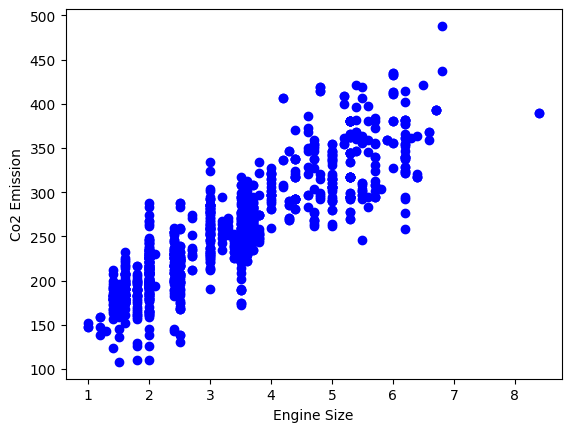

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

Creating the Data for training and testing

In [7]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            840 non-null    float64
 1   CYLINDERS             840 non-null    int64  
 2   FUELCONSUMPTION_COMB  840 non-null    float64
 3   CO2EMISSIONS          840 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 32.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 18 to 1064
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            227 non-null    float64
 1   CYLINDERS             227 non-null    int64  
 2   FUELCONSUMPTION_COMB  227 non-null    float64
 3   CO2EMISSIONS          227 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 8.9 KB


Engine size vs Co2 Emission plot for train data

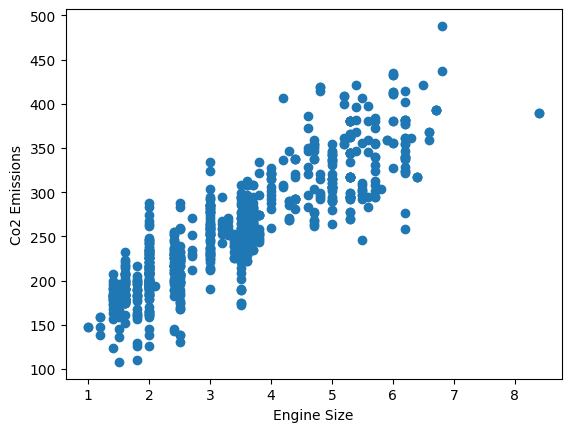

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

## Multiple Linear Regression

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
print(f"Coefficients: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")


Coefficients: [[10.34865531  7.69185086  9.77857638]]
Intercept: [63.39554736]


## Prediction

In [10]:
test_x = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
y_pred = regr.predict(test_x)
print(y_pred[:10])
print(f"Mean Squared Error: {np.mean((y_pred - test_y) ** 2):.2f}")
print(f"Variance score: {regr.score(test_x, test_y):.2f}") # 1 variance score will be perfect prediction

[[369.30061556]
 [200.91173358]
 [212.64602524]
 [212.64602524]
 [205.80102177]
 [222.73266005]
 [250.11267393]
 [204.82316413]
 [311.16192172]
 [341.4755085 ]]
Mean Squared Error: 540.54
Variance score: 0.85


In [76]:
# Try creating your own method from scratch for fit and predict method for better understanding - Reverse Engineering
# fit, Train

# from utils.helper import test
import utils.helper as help
import copy
help.test()

# Using training data defined above
# train_x, train_y

# Mean Squred Error calculation
def compute_cost(x_test, y_test, w, b):
    n = x_test.shape[0]
    cost = 0.0
    for i in range(n):
        f_wb_i = np.dot(x_test[i], w) + b
        cost = cost + (f_wb_i - y_test[i]) ** 2
    cost = cost / (2 * n)
    return cost

# Gradien Descent calculation
# Baiscally it adjusts the parameter and intercept to get the best results from model
def compute_gradient(x_train, y_train, w, b):
    m, n = x_train.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        err = (np.dot(x_train[i], w) + b) - y_train[i][0]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x_train[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db


# Method to calculate the Gradient descent
def gradient_descent(x, y, weight, bias, alpha, iterations):
    # data
    # calculate the error
    cost_history = []
    w = copy.deepcopy(weight)
    b = bias
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        cost_history.append(compute_cost(x, y, w, b))
    return w, b, cost_history


# Choosing random weight and bias, alpha and iterations
weights = np.zeros_like([0.67892413, 0.96673657, 0.2504499])
bias = 0.
alpha = 5.0e-4
iterations = 1000
x_train = train_x[1:5]
y_train = train_y[1:5]
# x_train = train_x
# y_train = train_y
print(f"initial weights: {weights}")

# Gradient descent method will give the right value of weights and biases
weights_f, bias_f, cost_history = gradient_descent(x_train, y_train, weights, bias, alpha, iterations)
print(f"weights_f: {weights_f}, bias_f: {bias_f}")
# Need to have some system that will adjust the iterations and learning rate
# Need to have the graph also to see how model correct itself
# Need to have the all the details printed to better mesurment
# compare bot sklearn and your model
# implement other strategy written in practice.ipynb
# plot the graph for bot training, testing and costl models
# Cost vs iteration graph
# Automatic all the topics will get covered if i complete this manually

test 1
Hello, World!
initial weights: [0. 0. 0.]
weights_f: [ 4.61174105  7.0442729  17.71237488], bias_f: 1.624604856581815


In [77]:
x_0 = test_x[0]
y_0 = test_y[0]
print(type(weights_f))
print(np.dot(x_0, weights_f))
print(type(bias_f))
print(f"prediction for: {x_0} is {np.dot(x_0, weights_f) + bias_f:0.2f}, and the target value is: {y_0}")
# And using sklearn prediction model
print(f"sklearn prediction model: {regr.predict(test_x[0:1])} for data: {test_x[0:1]}")

<class 'numpy.ndarray'>
388.0535951299708
<class 'numpy.float64'>
prediction for: [ 5.9 12.  15.6] is 389.68, and the target value is: [359]
sklearn prediction model: [[369.30061556]] for data: [[ 5.9 12.  15.6]]


## Summary

Implemented

- Multiple Linear Regression model using sklearn
- Training and Testing the model
- prediction of co2 emission using multiple features - Engine Size, Cylinders and Fuel Consumption
- This model has variance score of 0.87 